In [174]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
import os
from keras.models import Sequential
from keras.layers import Conv2D

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

In [175]:
!ls

DigiRecog.ipynb        Predictions-Klrao1.csv test.csv
Predictions-Klrao.csv  sample_submission.csv  train.csv


In [176]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [177]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
features = df_train.iloc[0:,1:]

In [179]:
features = features.values

In [180]:
features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [181]:
#df_train[0][df_train.iloc[:, 1:] > 0]
#df_train.iloc[0:1,df_train.iloc[:, 1:] > 0]
df_p = df_train.iloc[0:,1:]

In [182]:
df_p = df_p.values

In [183]:
df_rp = df_p.reshape(42000,28,28,1)

In [184]:
df_rp.shape

(42000, 28, 28, 1)

In [185]:
print("hello")

hello


In [186]:
df_y = df_train.iloc[0:,0:1]

In [187]:
df_y

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [188]:
df_y = df_y.values

In [189]:
df_train.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [193]:
Y=tf.keras.utils.to_categorical(df_y)

In [195]:
#Y1 = tf.keras.utils.to_categorical(Y)
print(Y.shape)
print(df_rp.shape)

(42000, 10)
(42000, 28, 28, 1)


In [196]:
X = df_rp
print(X.shape)

(42000, 28, 28, 1)


In [239]:
from tensorflow.keras.regularizers import l2
# Create a Sequential model object
cnnModel = models.Sequential()

# Add layers Conv2D for CNN and sepcify MaxPooling

# Layer 1 = input layer
cnnModel.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1),kernel_regularizer=l2(0.005)) )

cnnModel.add(layers.MaxPooling2D((2,2)))


# Layer 2
cnnModel.add(layers.Conv2D(64, (3,3), activation="relu",kernel_regularizer=l2(0.005)))

cnnModel.add(layers.MaxPooling2D((2,2)))
cnnModel.add(layers.Dropout(0.5))
#-----
#-----

# Layer 3
cnnModel.add(layers.Conv2D(64, (3,3), activation="relu" ))

cnnModel.add(layers.Flatten())


# Add Dense layers or fully connected layers
# Layer 4
cnnModel.add(layers.Dense(64, activation="relu" ,kernel_regularizer=l2(0.0005)))

# Layer 5
cnnModel.add(layers.Dense(32, activation="relu",kernel_regularizer=l2(0.0005)) )

# Layer 6
cnnModel.add(layers.Dense(10, activation="softmax" ))

cnnModel.summary()



Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_12 (Flatten)         (None, 576)             

In [240]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.33)

In [241]:
Xtrain.shape,Ytrain.shape

((28140, 28, 28, 1), (28140, 10))

In [242]:
cnnModel.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [243]:
# train the model

history = cnnModel.fit(Xtrain, Ytrain, epochs = 25, batch_size = 64, validation_split = 0.1)

Epoch 1/25
396/396 [==============================] - 10s 24ms/step - loss: 1.0186 - accuracy: 0.7906 - val_loss: 0.3626 - val_accuracy: 0.9616
Epoch 2/25
396/396 [==============================] - 10s 24ms/step - loss: 0.3636 - accuracy: 0.9542 - val_loss: 0.2786 - val_accuracy: 0.9737
Epoch 3/25
396/396 [==============================] - 9s 24ms/step - loss: 0.2913 - accuracy: 0.9638 - val_loss: 0.2232 - val_accuracy: 0.9797
Epoch 4/25
396/396 [==============================] - 9s 24ms/step - loss: 0.2361 - accuracy: 0.9721 - val_loss: 0.1943 - val_accuracy: 0.9812
Epoch 5/25
396/396 [==============================] - 10s 25ms/step - loss: 0.2042 - accuracy: 0.9754 - val_loss: 0.1757 - val_accuracy: 0.9826
Epoch 6/25
396/396 [==============================] - 10s 25ms/step - loss: 0.1830 - accuracy: 0.9773 - val_loss: 0.1397 - val_accuracy: 0.9872
Epoch 7/25
396/396 [==============================] - 11s 27ms/step - loss: 0.1623 - accuracy: 0.9784 - val_loss: 0.1387 - val_accuracy: 0

In [244]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

Final training loss 	 0.07951238751411438
Final training accuracy  0.9879175424575806


In [122]:
# testing the model

testLoss, testAccuracy = cnnModel.evaluate( Xtest, Ytest)

434/434 [==============================] - 1s 3ms/step - loss: 0.1000 - accuracy: 0.9826


In [123]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.10002250224351883
Testing accuracy  0.9826118350028992


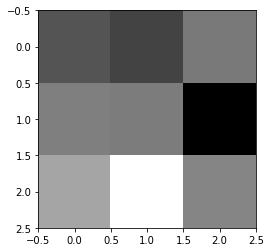

In [124]:
# shows the weights in layer 0 conv2d as gray map
top_layer = cnnModel.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')
plt.show()

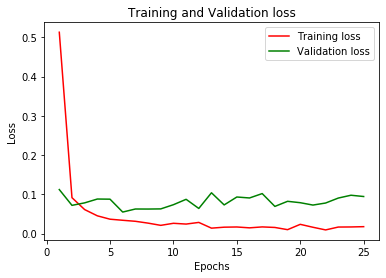

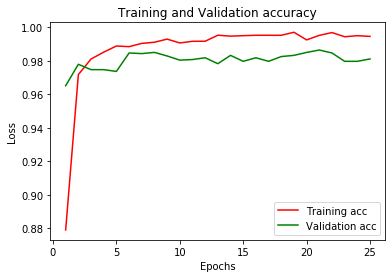

In [132]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [133]:
Y_prediction = cnnModel.predict(Xtest)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction, axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(Ytest,axis = 1) 

In [134]:
# Classification Report

from sklearn.metrics import classification_report 

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1442
           1       1.00      0.99      0.99      1531
           2       0.96      0.99      0.98      1352
           3       0.98      0.99      0.98      1448
           4       0.99      0.98      0.98      1334
           5       0.99      0.96      0.98      1231
           6       0.98      0.99      0.98      1359
           7       0.99      0.98      0.98      1478
           8       0.98      0.98      0.98      1299
           9       0.97      0.98      0.98      1386

    accuracy                           0.98     13860
   macro avg       0.98      0.98      0.98     13860
weighted avg       0.98      0.98      0.98     13860



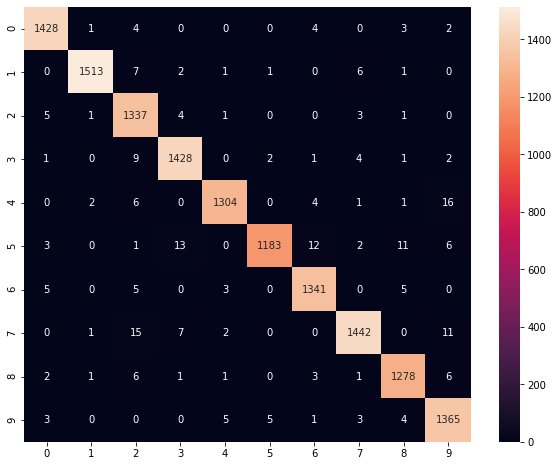

In [135]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

In [136]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
!ls

DigiRecog.ipynb       test.csv
sample_submission.csv train.csv


In [139]:
df_sample = pd.read_csv("sample_submission.csv")

In [140]:
df_sample

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [141]:
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
d_st = df_test.values

In [143]:
d_st.shape

(28000, 784)

In [144]:
d_st = d_st.reshape(28000, 28,28,1)

In [145]:
d_st.shape

(28000, 28, 28, 1)

In [146]:
Y_prediction = cnnModel.predict(d_st)

In [147]:
Y_prediction

array([[3.4387262e-20, 2.7754113e-20, 1.0000000e+00, ..., 2.0739718e-15,
        5.3853249e-15, 2.4740929e-27],
       [1.0000000e+00, 2.3064314e-14, 2.3786062e-14, ..., 1.4921089e-11,
        6.5518684e-13, 1.0031895e-09],
       [3.7378552e-15, 3.2179563e-16, 6.1320222e-18, ..., 1.1212738e-12,
        1.3805629e-10, 1.0000000e+00],
       ...,
       [4.3816333e-36, 1.0108173e-19, 3.8474274e-22, ..., 2.3168816e-21,
        5.2598759e-21, 2.6153224e-23],
       [1.1622022e-18, 1.6286104e-17, 4.2441653e-15, ..., 5.0279066e-11,
        2.3025031e-13, 1.0000000e+00],
       [7.6673830e-16, 4.2994393e-15, 1.0000000e+00, ..., 7.5528033e-16,
        3.5324560e-15, 7.7331573e-22]], dtype=float32)

In [148]:
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction, axis = 1)

In [149]:
Y_pred_classes

array([2, 0, 9, ..., 3, 9, 2])

In [150]:
df_Sub = {"Label":Y_pred_classes}

In [151]:
df_Sub

{'Label': array([2, 0, 9, ..., 3, 9, 2])}

In [152]:
df_Sub = pd.DataFrame({'Label': Y_pred_classes})

In [155]:
df_Sub.index+1

RangeIndex(start=1, stop=28001, step=1)

In [157]:
df_sample['Label'] = df_Sub['Label']

In [158]:
df_sample

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [160]:
df_sample.to_csv("Predictions-Klrao.csv", index=True)